In [ ]:
 !pip install patchify

In [ ]:
pip install segmentation-models

  Using cached efficientnet-1.0.0-py3-none-any.whl (17 kB)
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1


In [ ]:
pip install --upgrade keras

In [ ]:
pip install --upgrade keras efficientnet

  Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.


In [ ]:
pip install keras==2.3.1

  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires keras>=3.0.0, but you have keras 2.3.1 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
pip install --upgrade tensorflow

  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
!pip install python-dotenv

In [ ]:
pip install boto3

# Synthetic segmentation training data generator


### Team members
Nozipho Pretty Bhila

Desiree Malebana

Ninamukovhe Tshivhase

Maria Booysen

Joseph Mhlomi  

Shedrack Efienokwu

Kala Prince Maponyane           

Wycliffe Otieno      

## Table of contents

1. Introduction
2. Importing Packages
3. Data Loading
4. Exploratory Data Analysis (EDA)
4.1 Bar Chart
4.2 Pie Chart
5. Data Processing
5.1 Loading images into Tensor
5.2
6. Model Building
6.1

# Introduction

Training data is hard to get by and expensive. Training data for specific tasks, e.g. surface type segmentation, don’t readily exist and requires manual labeling of training images, where manual labeling is expensive. If training data does exist, the quantity of training data is usually not sufficient for model training. ##To be edited##

# Importing packages

In [ ]:
#//Notes - Adjusted Library to read and flow into functions//

## Library Imports Grouped by Functionality

# System Interaction:

import os # Provides functions for interacting with the operating system, like accessing files and directories.

# Data Science Functions:

import random # Provides functions for generating random numbers
import numpy as np # Provides powerful array manipulation capabilities. Used for numerical computations and data structures.
import pandas as pd # Provides functions for data analysis and manipulation in tabular format.

# Visualization:

import matplotlib.pyplot as plt # Used for creating static, animated, and interactive visualizations.
%matplotlib inline
import seaborn as sns # Builds on top of matplotlib to create statistical data visualizations.
from collections import Counter
from itertools import cycle

# Machine Learning:

import tensorflow as tf # The core library for machine learning tasks.
from tensorflow import keras # Specifically used for image data augmentation (generating variations of images).
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torch import nn, Tensor
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Conv2DTranspose, Input
from tensorflow.keras.optimizers import Adam


# Image Processing:

from PIL import Image # Provides functionalities for working with image files (opening, manipulating, saving).
import cv2 # OpenCV library, popular for computer vision tasks like image processing and analysis.
from skimage.transform import resize # Functions for image resizing and manipulation.
from skimage import img_as_ubyte # Converts image data to an unsigned 8-bit integer format.
from skimage.transform import resize
from skimage.color import gray2rgb
from io import BytesIO # Creates an in-memory stream of bytes, useful for handling binary data like images.

# importing required packages...
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tqdm import tqdm
import random
import pickle
from tensorflow.keras.callbacks import Callback, ModelCheckpoint,  EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam

Segmentation Models: using `keras` framework.


In [ ]:
from dotenv import find_dotenv, load_dotenv

# Data loading

# Working with dotenv
#Start by running the following on Terminal or Command Prompt:

pip install python-dotenv #This code will install the dotenv package on your python environment.

Load the relevant libraries from the package as follows:

from dotenv import find_dotenv, load_dotenv

Now, create a *.env* file within the working directory and store the variables that you will want to hide. See an example below:

aws_access_key_id="ABCDEFGH" #The quoted text are the relevent access key, API Keys, etc...
aws_secret_access_key="102030AXYZ"


Now, you can load the variables you have stored in the .env file as follows:

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

These functions are essential for working with environment variables stored in a .env file.
find_dotenv() function searches for a .env file in the current directory and its parent directories.
It returns the path to the first .env file it finds. If no .env file is found, it returns an empty string.
The .env file typically contains environment variables and their corresponding values.

load_dotenv(dotenv_path) function loads the environment variables from the specified .env file (if found).
It reads the key-value pairs from the .env file and sets them as environment variables in the current Python process.
By doing this, you can access these environment variables using os.environ or other methods within your code. The approach allows you to keep sensitive information (such as API keys, database credentials, etc.) separate from your codebase.

See an example of how this will work in our case when we configure our python environment to read data from the s3 bucket on AWS:

#Initialize S3 client
s3_client = boto3.client(
    service_name='s3',
    region_name='eu-west-1',
    aws_access_key_id=os.getenv("aws_access_key_id"),
    aws_secret_access_key=os.getenv("aws_secret_access_key")
)

Notice how I'm calling the access key and access key id from the .env file. I don't need to include those sensitive information in my code which will be available punlicly.

One more important step: Create .gitignore file and add .env to that file. In this way, when you do version control, all files included in the .gitignore will be excluded.

In [ ]:
# Reading Data from s3 bucket

import os
import boto3
from PIL import Image
import numpy as np
import io

In [ ]:
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

False

In [ ]:
# Define bucket name
bucket_name = '2307-07-synthetic-segmentation-a'

# Define folder names to iterate over
folder_names = ['Lands', 'mountain', 'Water',  'Roads']

# Initialize image list
image_list = []

for folder_name in folder_names:
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)

    # Retrieve JPEG and PNG files in the folder
    image_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Download and convert each file
    for image_file in image_files:
        try:
            obj = s3_client.get_object(Bucket=bucket_name, Key=image_file)
            image_bytes = obj['Body'].read()
            image = Image.open(io.BytesIO(image_bytes))
            image_array = np.array(image)
            image_list.append(image_array)
        except Exception as e:
            print(f"Error processing {image_file}: {e}")

# Now image_list contains NumPy arrays of images

In [ ]:
# Printing the number of loaded images

print(f"Loaded {len(image_list)} images from S3 bucket {bucket_name}.")

Loaded 428 images from S3 bucket 2307-07-synthetic-segmentation-a.


In [ ]:
# Dictionary to store the count of images in each folder
folder_counts = {}

# Loop through each folder and process images
for folder_name in folder_names:
    # Retrieve JPEG files in the folder
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)
    jpg_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].lower().endswith('.jpg')]

    # Retrieve PNG files in the folder
    png_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].lower().endswith('.png')]

    # Combine JPEG and PNG files and count the total number of images in the folder
    total_images = len(jpg_files) + len(png_files)

    # Store the count in the dictionary
    folder_counts[folder_name] = total_images

# Print the total number of images in each folder
print("Number of images in each folder:")
for folder_name, count in folder_counts.items():
    print(f"{folder_name}: {count} images")


Number of images in each folder:
Lands: 115 images
mountain: 105 images
Water: 104 images
Roads: 103 images


In [ ]:
import random

def display_sample_images(image_list, num_images=5):
    if len(image_list) == 0:
        print("No images to display.")
        return

    display_count = min(len(image_list), num_images)

    # Random selection of images
    selected_images = random.sample(image_list, display_count)
    fig, axes = plt.subplots(1, display_count, figsize=(40, 20))

    # Loop through the selected images, displaying each in a subplot
    for i, img in enumerate(selected_images):
        ax = axes[i] if display_count > 1 else axes
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Image {i+1}")

    plt.show()

# Display images
display_sample_images(image_list, num_images=5)

# Exploratory Data Analysis

### Distribution of the categories and their counts

The distribution of categories and their counts gives us an understanding of what the data is composed of so we can understand the dataset characteristics. It helps with detecting imbalanced data, model bias assessment prior to model training, model perfomance estimation and for communication and collaboration between team members

Number of images in each folder:
Lands: 115 images
mountain: 105 images
Water: 104 images
Roads: 103 images


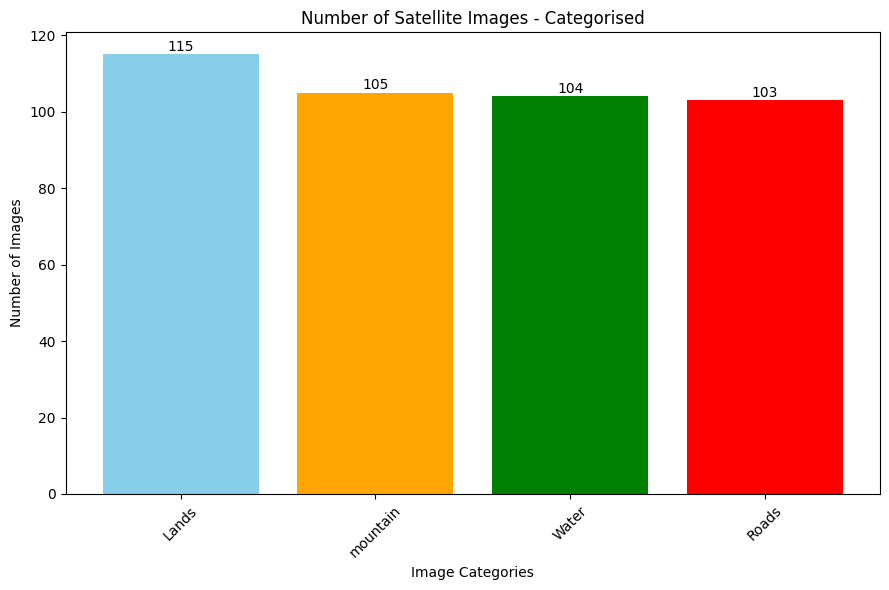

In [ ]:
#//Notes: Previous Bar chart did not count the categories automatically//

# Bar chart to visually see the count of images in the folders

folder_counts = {}

# Loop through each folder and process images
for folder_name in folder_names:
# Retrieve objects in the folder
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)

# Initialize count
    total_images = 0

    if 'Contents' in response:
# Filter and count JPEG and PNG files
        jpg_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].lower().endswith('.jpg')]
        png_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].lower().endswith('.png')]

# Combine JPEG and PNG files and count the total number of images in the folder
        total_images = len(jpg_files) + len(png_files)

# Store the count in the dictionary
    folder_counts[folder_name] = total_images

# Print the total number of images in each folder
print("Number of images in each folder:")
for folder_name, count in folder_counts.items():
    print(f"{folder_name}: {count} images")

# Generate a list of colors, cycling through a set list if there are many categories
colors = cycle(['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

# Create a bar plot
plt.figure(figsize=(9, 6))
bars = plt.bar(range(len(folder_counts)), folder_counts.values(), align='center', color=[next(colors) for _ in folder_counts])

# Add the folder names as x-axis labels
plt.xticks(range(len(folder_counts)), folder_counts.keys(), rotation=45)

# Add count labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Image Categories')
plt.ylabel('Number of Images')
plt.title('Number of Satellite Images - Categorised')

# Display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

Number of images in each folder:
Lands: 115 images
mountain: 105 images
Water: 104 images
Roads: 103 images


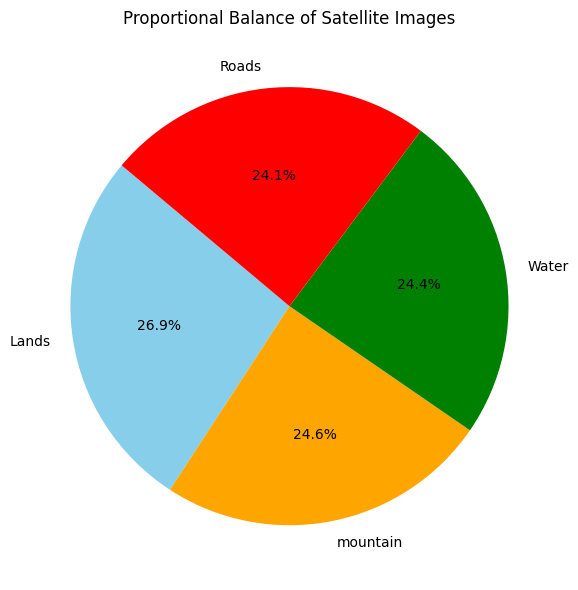

In [ ]:
# Pie Chart is helpful for a proportional representation of our dataset

# Dictionary to store the count of images in each folder
folder_counts = {}

# Loop through each folder and process images
for folder_name in folder_names:
    # Retrieve objects in the folder
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)

    # Initialize count
    total_images = 0

    if 'Contents' in response:
        # Filter and count JPEG and PNG files
        jpg_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].lower().endswith('.jpg')]
        png_files = [obj['Key'] for obj in response['Contents'] if obj['Key'].lower().endswith('.png')]

        # Combine JPEG and PNG files and count the total number of images in the folder
        total_images = len(jpg_files) + len(png_files)

    # Store the count in the dictionary
    folder_counts[folder_name] = total_images

# Print the total number of images in each folder
print("Number of images in each folder:")
for folder_name, count in folder_counts.items():
    print(f"{folder_name}: {count} images")

# Generate a list of colors for the pie chart
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(folder_counts.values(), labels=folder_counts.keys(), colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Proportional Balance of Satellite Images')

# Display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

## Data Processing

#### Converting the images to Tensor

In [ ]:
# TPreprocessing images - adjusting size and format to make them ready for further processing

def preprocess_image(image_array, target_size=(256, 256)):
    # Convert the image to float32 to reduce memory consumption
    image_array = image_array.astype(np.float32) / 255.0

    # Resize image
    image_resized = resize(image_array, target_size, anti_aliasing=True)

    # Standardize color channels: ensure all images are in RGB format
    if image_resized.ndim == 2:  # If the image is grayscale, convert it to RGB
        image_resized = gray2rgb(image_resized)
    elif image_resized.shape[2] == 4:  # If the image has an alpha channel, remove it
        image_resized = image_resized[..., :3]

    return image_resized

# Process list of images individually, applying transformations to each image for consistent size and colour format
# Managing memory usage effectively & prevent crashes due to memory overflow
images = []
for img in image_list:
    try:
        processed_image = preprocess_image(img)
        images.append(processed_image)
    except MemoryError as e:
        print(f"MemoryError while processing the image: {e}")
# Handle the memory error, (e.g., by skipping the image or freeing up resources)
        break  # Exit the loop

# Convert list of processed images into a TensorFlow tensor
# Displays five random images from this tensor; if no images are processed - print a statement to inform
if images:
    images_tensor = tf.convert_to_tensor(images, dtype=tf.float32)
    print("Tensor conversion successful.")

# Display 5 random images
    def display_random_images(images, num_images=5):
        plt.figure(figsize=(40, 20))
        indices = np.random.choice(images.shape[0], num_images, replace=False)
        for i, index in enumerate(indices):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[index])
            plt.title(f"Image {index+1}")
            plt.axis("off")
        plt.show()

    display_random_images(images_tensor)
else:
    print("No images that were processed.")
    print("Tensor conversion successful.")

# Verify the minimum and maximum pixel values and the data type
# Helps ensure that the image data is correctly formatted and scaled for processing tasks

print("Min pixel value:", np.min(images_tensor[0]))
print("Max pixel value:", np.max(images_tensor[0]))

# Ensure that the dtype is float32
print("Data type:", images_tensor.dtype)

# //Note - If the min and max values reported are between 0 and 1,
# //It indicates that the images are scaled appropriately - Neural Network Models expect inputs in this range

# Image segmentation

For our Image segmentation, we are building a UNet model using semantic segmentation model with a ResNet34 backbone for multi-class image segmentation , we are using it to make predictions on test images and visualize the results.


Setting the framework for a deep learning model to TensorFlow's Keras API using the syntax sm.set_framework('tf.keras')


In [ ]:
sm.set_framework('tf.keras')

In [ ]:

# Define bucket name and target size for resizing
bucket_name = '2307-07-synthetic-segmentation-a'
target_size = (256, 256)


def load_and_process_images(folder_name):
    image_dataset = []
    try:
        response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)
        image_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].lower().endswith(('.jpg', '.jpeg', '.png'))]
        for image_file in image_files:
            try:
                obj = s3_client.get_object(Bucket=bucket_name, Key=image_file)
                image_bytes = obj['Body'].read()
                image = Image.open(io.BytesIO(image_bytes))
                image_resized = image.resize(target_size)  # Resize the image
                if image_resized.mode != 'RGB':  # Ensure all images are in RGB mode
                    image_resized = image_resized.convert('RGB')
                image_array = np.array(image_resized)
                image_dataset.append(image_array)
            except Exception as e:
                print(f"Error processing {image_file}: {e}")
    except Exception as e:
        print(f"Error listing objects in folder {folder_name}: {e}")
    return image_dataset

# Load and process training images
train_images = load_and_process_images('train_image')

# Load and process mask images
train_masks = load_and_process_images('train_mask')

# Check dimensions
assert all(img.shape == (256, 256, 3) for img in train_images), "Some train images have incorrect dimensions"
assert all(mask.shape == (256, 256, 3) for mask in train_masks), "Some train masks have incorrect dimensions"

# Now train_images and train_masks contain NumPy arrays of consistently sized images and masks


In [ ]:
mask_dataset = np.array(train_masks)
image_dataset = np.array(train_images)

In [ ]:
image_dataset.shape

(60, 256, 256, 3)

In [ ]:
mask_dataset.shape

(60, 256, 256, 3)

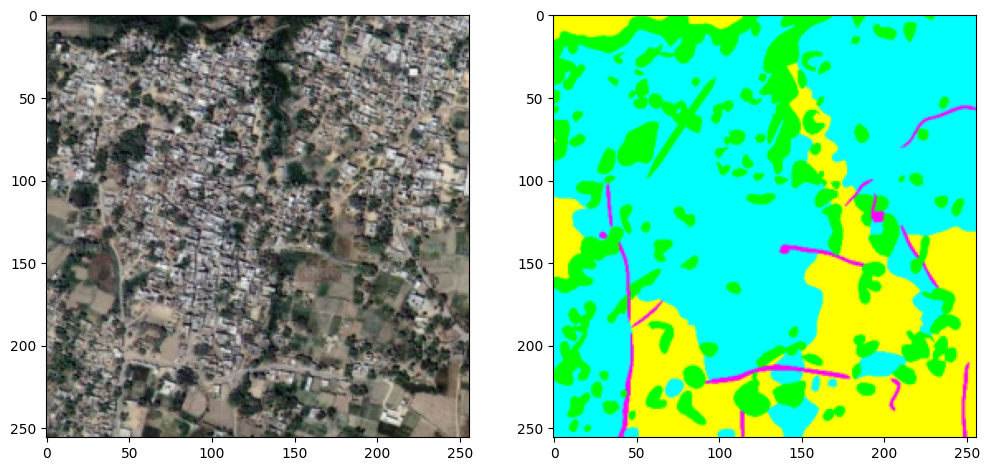

In [ ]:
# Sanity check...
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

In [ ]:
import pandas as pd
from io import StringIO

    # Specify the bucket name and file name
bucket_name = '2307-07-synthetic-segmentation-a'
file_key = 'class_dict_seg.csv'


def read_csv_from_s3(bucket_name, file_key):

    # Read CSV file from S3
    obj = s3_client.get_object(Bucket=bucket_name, Key=file_key)
    data = obj['Body'].read().decode('utf-8')

    # Convert CSV data to Pandas DataFrame
    mask_labels = pd.read_csv(StringIO(data))

    return mask_labels

mask_labels = read_csv_from_s3(bucket_name, file_key)
print(mask_labels.head())  # Display the first few rows of the DataFrame

     name    r    g    b
0   urban    0  255  255
1   water    0    0  255
2  forest    0  255    0
3    land  255  255    0
4    road  255    0  255


In [ ]:
# converting 3 values (RGB) to 1 label values...
def rgb_to_labels(img, mask_labels):
    label_seg = np.zeros(img.shape,dtype=np.uint8)
    for i in range(mask_labels.shape[0]):
        label_seg[np.all(img == list(mask_labels.iloc[i, [1,2,3]]), axis=-1)] = i
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels...
    return label_seg

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_labels(mask_dataset[i], mask_labels) # calling rgb to labels for each images...
    labels.append(label)

In [ ]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3) # adding channel dim...

Unique labels in label dataset are:  [0 1 2 3 4]


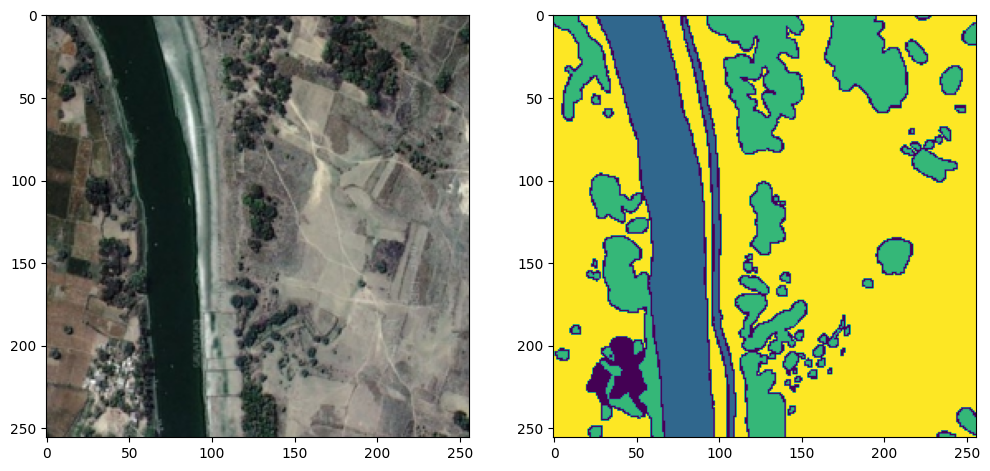

In [ ]:
print("Unique labels in label dataset are: ", np.unique(labels))

#Another Sanity check...
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [ ]:
n_classes = len(np.unique(labels)) # 5 classes...
labels_cat = to_categorical(labels, num_classes=n_classes) # one hot encoding the labels...

In [ ]:
n_classes

5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset,
                                                    labels_cat, test_size = 0.20,
                                                    random_state = 42) # train test split for data...

### Modeling

In [ ]:
# using weights from pretained resnet model...
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [ ]:
# preprocess input...
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)

In [ ]:
# define model...
model_resnet_backbone = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

In [ ]:
# accuracy as metrics, adam optimizer and loss function that needs to be optimized is categorical crossentropy as its a multiclass classification problem...
metrics=['accuracy']
model_resnet_backbone.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

Model summary

In [ ]:
model_resnet_backbone.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ data (InputLayer)         │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_data                   │ (None, None, None, 3)  │              9 │ data[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 3)  │              0 │ bn_data[0][0]          │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv0 (Conv2D)            │ (None, None, None, 64) │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn0 (BatchNormalization)  │ (None, None, None, 64) │            256 │ conv0[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ relu0 (Activation)        │ (None, None, None, 64) │              0 │ bn0[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ relu0[0][0]            │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pooling0 (MaxPooling2D)   │ (None, None, None, 64) │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage1_unit1_bn1          │ (None, None, None, 64) │            256 │ pooling0[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage1_unit1_relu1        │ (None, None, None, 64) │              0 │ stage1_unit1_bn1[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, None, None, 64) │              0 │ stage1_unit1_relu1[0]… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage1_unit1_conv1        │ (None, None, None, 64) │         36,864 │ zero_padding2d_2[0][0] │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage1_unit1_bn2          │ (None, None, None, 64) │            256 │ stage1_unit1_conv1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stage1_unit1_relu2        │ (None, None, None, 64) │              0 │ stage1_unit1_bn2[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, None, None, 64) │              0 │ stage1_unit1_relu2[0]… │
│ (ZeroPadding2D)      

 Total params: 24,456,734 (93.30 MB)

 Trainable params: 24,439,384 (93.23 MB)

 Non-trainable params: 17,350 (67.77 KB)

Training the model for 80 Epochs

In [ ]:
# training the model for X amount of epochs with batch size of 16...

history = model_resnet_backbone.fit(X_train_prepr,
          y_train,
          batch_size=16,
          epochs=1,
          verbose=1,
          validation_data=(X_test_prepr, y_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 121s 30s/step - accuracy: 0.1215 - loss: 2.0073 - val_accuracy: 0.0829 - val_loss: 24.4502


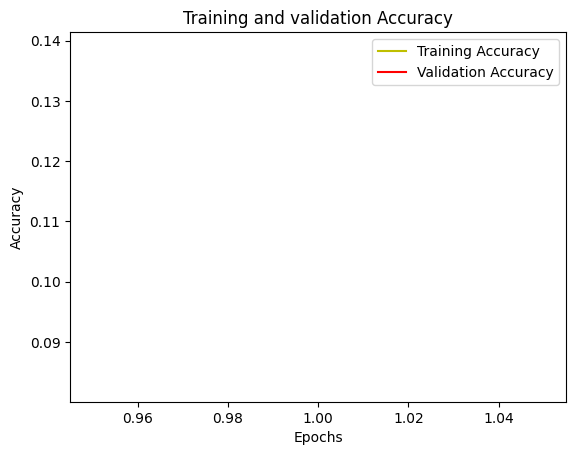

In [ ]:
# plotting train and val accuracy in each epoch...
history = history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_resnet_backbone.save('my_model.keras')

In [ ]:
model = load_model('my_model.keras') # loading model...

In [ ]:
# making predictions...
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [ ]:
# randomly selecting an image from the test set and making prediction...
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


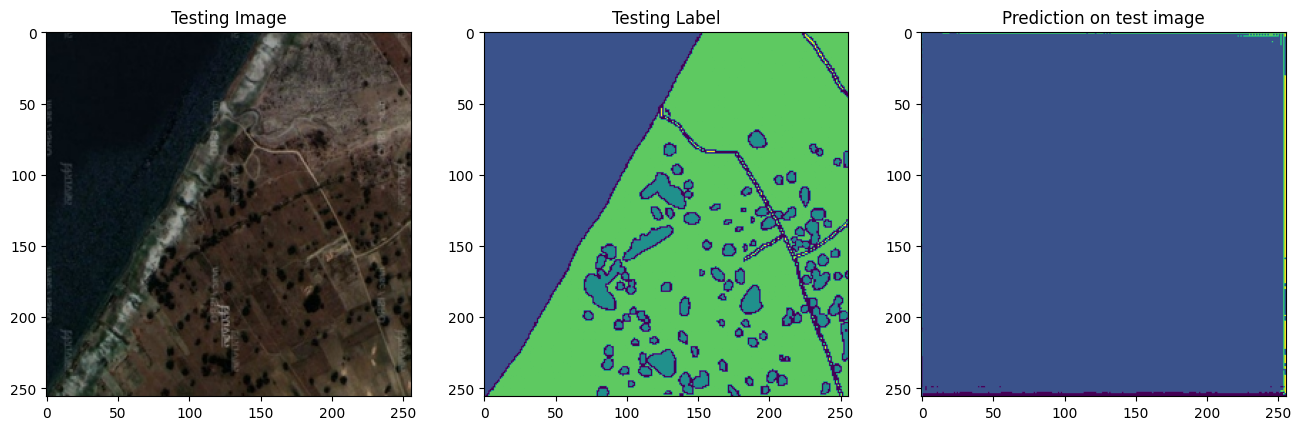

In [ ]:
def predict_and_plot_random_image(model, X_test, y_test_argmax):
    # Randomly selecting an image from the test set and making prediction...
    test_img_number = random.randint(0, len(X_test) - 1)
    test_img = X_test[test_img_number]
    ground_truth = y_test_argmax[test_img_number]
    test_img_input = np.expand_dims(test_img, 0)
    prediction = model.predict(test_img_input)
    predicted_img = np.argmax(prediction, axis=3)[0,:,:]

    # Plotting the real image, test labeled image, and predicted labeled image...
    plt.figure(figsize=(16, 12))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img)
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth)
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(predicted_img)
    plt.show()

# Call the function to predict and plot a random image
predict_and_plot_random_image(model, X_test, y_test_argmax)

In [ ]:
images_tensor.shape

TensorShape([428, 256, 256, 3])

### Packages and Visualisation

Input tensor shape: (428, 256, 256, 3)
Image grid shape: torch.Size([3, 1292, 1292])


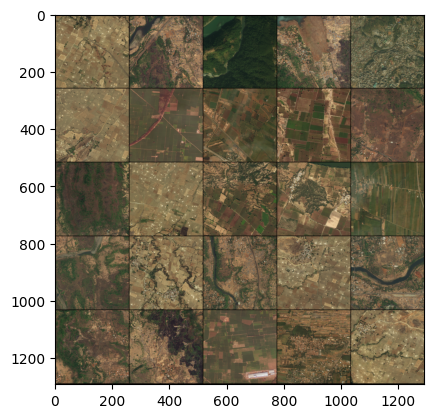

Min pixel value: tf.Tensor(0.0, shape=(), dtype=float32)
Max pixel value: tf.Tensor(1.0, shape=(), dtype=float32)
Data type: <dtype: 'float32'>


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch

# Ensure that the manual seed is set for reproducibility
tf.random.set_seed(0)

def show_tensor_images(image_tensor, num_images=25, size=(3, 256, 256), nrow=5, show=True):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    print(f"Input tensor shape: {image_tensor.shape}")  # Debug: Check input tensor shape

    # Normalize the image tensor to [0, 1] if it's not already in that range
    if tf.reduce_max(image_tensor) > 1.0 or tf.reduce_min(image_tensor) < 0.0:
        image_tensor = (image_tensor + 1) / 2  # Assuming the tensor was in range [-1, 1]

    # Convert TensorFlow tensor to PyTorch tensor for visualization
    image_tensor = torch.tensor(image_tensor.numpy()).permute(0, 3, 1, 2)

    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=nrow)

    print(f"Image grid shape: {image_grid.shape}")  # Debug: Check image grid shape

    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    if show:
        plt.show()

# Assuming images_tensor is a pre-existing TensorFlow tensor of RGB images with shape (batch_size, 256, 256, 3)

# Displaying images from the existing tensor
show_tensor_images(images_tensor, size=(3, 256, 256))

# Verify the minimum and maximum pixel values and the data type
# Helps ensure that the image data is correctly formatted and scaled for processing tasks
print("Min pixel value:", tf.reduce_min(images_tensor))
print("Max pixel value:", tf.reduce_max(images_tensor))

# Ensure that the dtype is float32
print("Data type:", images_tensor.dtype)


### Conditional Gan Model (Model Definition)

In [ ]:
class Generator(nn.Module):
    '''
    Generator Class
    Values:
        input_dim: the dimension of the input vector, a scalar
        im_chan: the number of channels of the output image, a scalar
              (MNIST is black-and-white, so 1 channel is your default)
        hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, input_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.input_dim = input_dim
        # Build the neural network
        self.gen = nn.Sequential(
            self.make_gen_block(input_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        '''
        Function to return a sequence of operations corresponding to a generator block of DCGAN;
        a transposed convolution, a batchnorm (except in the final layer), and an activation.
        Parameters:
            input_channels: how many channels the input feature representation has
            output_channels: how many channels the output feature representation should have
            kernel_size: the size of each convolutional filter, equivalent to (kernel_size, kernel_size)
            stride: the stride of the convolution
            final_layer: a boolean, true if it is the final layer and false otherwise
                      (affects activation and batchnorm)
        '''
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True),
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh(),
            )

    def forward(self, noise):
        '''
        Function for completing a forward pass of the generator: Given a noise tensor,
        returns generated images.
        Parameters:
            noise: a noise tensor with dimensions (n_samples, input_dim)
        '''
        x = noise.view(len(noise), self.input_dim, 1, 1)
        return self.gen(x)

def get_noise(n_samples, input_dim, device='cpu'):
    '''
    Function for creating noise vectors: Given the dimensions (n_samples, input_dim)
    creates a tensor of that shape filled with random numbers from the normal distribution.
    Parameters:
        n_samples: the number of samples to generate, a scalar
        input_dim: the dimension of the input vector, a scalar
        device: the device type
    '''
    return torch.randn(n_samples, input_dim, device=device)

In [ ]:
class Discriminator(nn.Module):
    '''
    Discriminator Class
    Values:
      im_chan: the number of channels of the output image, a scalar
            (MNIST is black-and-white, so 1 channel is your default)
      hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, im_chan=1, hidden_dim=64):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        '''
        Function to return a sequence of operations corresponding to a discriminator block of the DCGAN;
        a convolution, a batchnorm (except in the final layer), and an activation (except in the final layer).
        Parameters:
            input_channels: how many channels the input feature representation has
            output_channels: how many channels the output feature representation should have
            kernel_size: the size of each convolutional filter, equivalent to (kernel_size, kernel_size)
            stride: the stride of the convolution
            final_layer: a boolean, true if it is the final layer and false otherwise
                      (affects activation and batchnorm)
        '''
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True),
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
            )

    def forward(self, image):
        '''
        Function for completing a forward pass of the discriminator: Given an image tensor,
        returns a 1-dimension tensor representing fake/real.
        Parameters:
            image: a flattened image tensor with dimension (im_chan)
        '''
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

### Class Input

In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: get_one_hot_labels

import torch.nn.functional as F
def get_one_hot_labels(labels, n_classes):
    '''
    Function for creating one-hot vectors for the labels, returns a tensor of shape (?, num_classes).
    Parameters:
        labels: tensor of labels from the dataloader, size (?)
        n_classes: the total number of classes in the dataset, an integer scalar
    '''
    #### START CODE HERE ####
    return F.one_hot(labels, num_classes= n_classes)
    #### END CODE HERE ####

In [ ]:
assert (
    get_one_hot_labels(
        labels=torch.Tensor([[0, 2, 1]]).long(),
        n_classes=3
    ).tolist() ==
    [[
      [1, 0, 0],
      [0, 0, 1],
      [0, 1, 0]
    ]]
)
print("Success!")

Success!


In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: combine_vectors
def combine_vectors(x, y):
    '''
    Function for combining two vectors with shapes (n_samples, ?) and (n_samples, ?).
    Parameters:
      x: (n_samples, ?) the first vector.
        In this assignment, this will be the noise vector of shape (n_samples, z_dim),
        but you shouldn't need to know the second dimension's size.
      y: (n_samples, ?) the second vector.
        Once again, in this assignment this will be the one-hot class vector
        with the shape (n_samples, n_classes), but you shouldn't assume this in your code.
    '''
    # Note: Make sure this function outputs a float no matter what inputs it receives
    #### START CODE HERE ####
    combined = torch.cat((x.float(),y.float()),1)
    #### END CODE HERE ####
    return combined

In [ ]:
assert tuple(combine_vectors(torch.randn(1, 4, 5), torch.randn(1, 8, 5)).shape) == (1, 12, 5)
assert tuple(combine_vectors(torch.randn(1, 10, 12).long(), torch.randn(1, 20, 12).long()).shape) == (1, 30, 12)
print("Success!")

Success!


In [ ]:
images_tensor.shape

TensorShape([428, 256, 256, 3])

### Training

In [ ]:
images_tensor = (3, 256, 256)
n_classes = 10

In [ ]:
# Import the necessary libraries
!pip install torchvision
from torchvision import transforms


In [ ]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 50
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.0002
device = 'cuda'

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [ ]:
import numpy as np
import tensorflow as tf
import torch
from torch.utils.data import DataLoader, TensorDataset

# Function to get one-hot encoded labels
def get_one_hot_labels(labels, num_classes):
    return torch.nn.functional.one_hot(labels, num_classes=num_classes)

# Simulate a dataset with the shape (dataset_size, channels, height, width)
dataset_size = 428
channels, height, width = 3, 256, 256
images_tensor = tf.convert_to_tensor(np.random.rand(dataset_size, channels, height, width).astype(np.float32))

# Check the shape of images_tensor
print(f"Original images_tensor type: {type(images_tensor)}")
print(f"Original images_tensor shape: {images_tensor.shape}")

# Convert TensorFlow tensor to NumPy array, then to PyTorch tensor
images_tensor_np = images_tensor.numpy()
images_tensor_pt = torch.tensor(images_tensor_np)

# Ensure the tensor has the correct dimensions before permuting
if images_tensor_np.ndim == 4:
    images_tensor_pt = images_tensor_pt.permute(0, 3, 1, 2)
    print(f"Converted images_tensor_pt shape: {images_tensor_pt.shape}")

    # Example labels for the images_tensor
    labels = torch.tensor([i % 10 for i in range(dataset_size)])  # Adjust to match dataset size

    # Number of classes
    n_classes = 10

    # Get one-hot encoded labels
    one_hot_labels = get_one_hot_labels(labels, n_classes)
    print("One-hot encoded labels:\n", one_hot_labels)

    # Prepare DataLoader
    dataset = TensorDataset(images_tensor_pt, one_hot_labels)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
else:
    print(f"Error: Expected images_tensor to have 4 dimensions but got {images_tensor_np.ndim} dimensions")


Original images_tensor type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Original images_tensor shape: (428, 3, 256, 256)
Converted images_tensor_pt shape: torch.Size([428, 256, 3, 256])
One-hot encoded labels:
 tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0]])


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Function to get one-hot encoded labels
def get_one_hot_labels(labels, num_classes):
    return torch.nn.functional.one_hot(labels, num_classes=num_classes)

# Simulate a batch of images with the shape (batch_size, height, width, channels)
batch_size = 32
height, width, channels = 256, 256, 3
dataset_size = 428  # Set the desired dataset size
images_tensor = np.random.rand(dataset_size, height, width, channels).astype(np.float32)

# Convert to PyTorch tensor and permute dimensions
images_tensor_pt = torch.tensor(images_tensor).permute(0, 3, 1, 2)

# Example labels for the full dataset
labels = torch.tensor([i % 10 for i in range(dataset_size)])  # Adjust to match dataset size

# Number of classes
n_classes = 10

# Get one-hot encoded labels for the full dataset
one_hot_labels = get_one_hot_labels(labels, n_classes)

print("Size of images_tensor_pt:", images_tensor_pt.size())
print("Size of one_hot_labels:", one_hot_labels.size())

# Prepare DataLoader
dataset = TensorDataset(images_tensor_pt, one_hot_labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Size of images_tensor_pt: torch.Size([428, 3, 256, 256])
Size of one_hot_labels: torch.Size([428, 10])


In [ ]:
# Ensure images_tensor is a TensorFlow tensor and convert to NumPy array
if isinstance(images_tensor, tuple):
    images_tensor = tf.convert_to_tensor(images_tensor)

# Get the shape of images_tensor
image_shape = images_tensor.shape[1:]  # Exclude batch size

# Define the test function
def test_input_dims():
    # Use the shape of images_tensor and n_classes
    z_dim = 64
    n_classes = 4
    gen_dim, disc_dim = get_input_dimensions(z_dim, image_shape, n_classes)

    # Expected values for the test case (adapt according to your expected dimensions)
    expected_gen_dim = z_dim + n_classes
    expected_disc_dim = image_shape[0] + n_classes

    assert gen_dim == expected_gen_dim
    assert disc_dim == expected_disc_dim

# Run the test
test_input_dims()
print("Success!")



NameError: name 'get_input_dimensions' is not defined

### Train

In [ ]:
images_tensor.shape

(428, 256, 256, 3)

In [ ]:
import torch
import tensorflow as tf
import numpy as np
import torch.nn.functional as F

# Ensure images_tensor is a TensorFlow tensor and convert to NumPy array if necessary
if isinstance(images_tensor, tuple):
    images_tensor = tf.convert_to_tensor(images_tensor)

# Convert TensorFlow tensor to a NumPy array
images_tensor_np = images_tensor  # Corrected line

# Convert NumPy array to a PyTorch tensor
images_tensor_pt = torch.tensor(images_tensor_np).permute(0, 3, 1, 2).float()

# Example labels (adjust according to your dataset)
batch_size = images_tensor_pt.shape[0]
n_classes = 4  # Example number of classes
labels = torch.tensor([i % n_classes for i in range(batch_size)])  # Example labels

# Ensure labels are converted to one-hot encoding
def get_one_hot_labels(labels, n_classes):
    return F.one_hot(labels, num_classes=n_classes).float()

# Example one-hot encoded labels
one_hot_labels = get_one_hot_labels(labels, n_classes)

print(f"Converted images_tensor shape: {images_tensor_pt.shape}")
print(f"One-hot encoded labels shape: {one_hot_labels.shape}")
torch.save(images_tensor_pt, 'images_tensor.pt')

Converted images_tensor shape: torch.Size([428, 3, 256, 256])
One-hot encoded labels shape: torch.Size([428, 4])


### Display Images

In [ ]:
# Importing necessary libraries
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Define the Generator model
class Generator(nn.Module):
    def __init__(self, input_dim=10, im_chan=3, hidden_dim=64):
        super(Generator, self).__init__()
        self.input_dim = input_dim
        self.gen = nn.Sequential(
            self.make_gen_block(input_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True)
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True)
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh()
            )

    def forward(self, noise):
        return self.gen(noise)

# Function to show generated images
def show_tensor_images(images_tensor, num_images=25, size=(3, 256, 256)):
    images_tensor = (images_tensor + 1) / 2
    image_unflat = images_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

# Load the images tensor
images_tensor_pt = torch.load('images_tensor.pt')

# Use CPU as the device
device = 'cpu'

# Instantiate the generator model and move to device
gen = Generator(input_dim=10, im_chan=3).to(device)

# Define parameters
n_epochs = 50
batch_size = 32
noise_dim = 10

# DataLoader
dataloader = DataLoader(TensorDataset(images_tensor_pt), batch_size=batch_size, shuffle=True)

for epoch in range(n_epochs):
    for real in dataloader:
        real = real[0].to(device)

        # Generate random noise
        noise = torch.randn(batch_size, noise_dim, 1, 1, device=device)

        # Generate fake images
        fake = gen(noise)

        # Show generated images (optional, for visualization)
        show_tensor_images(fake)

    print(f"Epoch {epoch+1}/{n_epochs} completed.")

# Save the generated images (optional)
# torch.save(fake, 'generated_images.pt')


In [ ]:
images_tensor.shape

(428, 256, 256, 3)

In [ ]:
pip install torch torchvision matplotlib


## Import Libraries and Define Parameters

First, we import necessary libraries and define global parameters like batch size, number of epochs, learning rate, etc.

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization, LeakyReLU, Activation, Input, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install boto3 pillow


In [ ]:
import boto3
import os
from io import BytesIO  # Import io for reading image bytes
from PIL import Image
import numpy as np



# Define bucket name and target size for resizing
bucket_name = '2307-07-synthetic-segmentation-a'
target_size = (256, 256)

def load_and_process_images(folder_name):
    image_dataset = []
    try:
        response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)
        image_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].lower().endswith(('.jpg', '.jpeg', '.png'))]
        for image_file in image_files:
            try:
                obj = s3_client.get_object(Bucket=bucket_name, Key=image_file)
                image_bytes = obj['Body'].read()
                image = Image.open(BytesIO(image_bytes))  # Use BytesIO to read image bytes
                image_resized = image.resize(target_size)  # Resize the image
                if image_resized.mode != 'RGB':  # Ensure all images are in RGB mode
                    image_resized = image_resized.convert('RGB')
                image_array = np.array(image_resized)
                image_dataset.append(image_array)
            except Exception as e:
                print(f"Error processing {image_file}: {e}")
    except Exception as e:
        print(f"Error listing objects in folder {folder_name}: {e}")
    return image_dataset

# Load and process training images
train_images = load_and_process_images('train_image')

# Load and process mask images
train_masks = load_and_process_images('train_mask')

# Check dimensions
assert all(img.shape == (256, 256, 3) for img in train_images), "Some train images have incorrect dimensions"
assert all(mask.shape == (256, 256, 3) for mask in train_masks), "Some train masks have incorrect dimensions"

# Now train_images and train_masks contain NumPy arrays of consistently sized images and masks


In [ ]:
def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image = np.array(image)
    image = (image - 127.5) / 127.5  # Normalize to [-1, 1]
    return image

def load_and_process_images(folder_name):
    image_dataset = []
    try:
        response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_name)
        image_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].lower().endswith(('.jpg', '.jpeg', '.png'))]
        for image_file in image_files:
            try:
obj = s3_client.get_object(Bucket=bucket_name, Key=image_file)
                image_bytes = obj['Body'].read()
                image = Image.open(BytesIO(image_bytes))  # Use BytesIO to read image bytes
                image_resized = image.resize(target_size)  # Resize the image
                image_array = np.array(image_resized) / 255.0  # Normalize pixel values between 0 and 1
if image_resized.mode != 'RGB':  # Ensure all images are in RGB mode
    image_resized = image_resized.convert('RGB')
    image_array = np.array(image_resized)
    image_array = np.array(image_resized)
image_dataset.append(image_array)
# Load and preprocess images
from some_module import load_images_from_s3
X_train = load_images_from_s3(bucket_name, prefix)


IndentationError: expected an indented block after 'try' statement on line 13 (<ipython-input-24-a47c34df7614>, line 14)

In [ ]:
# Get the output shape of the generator model
output_shape = generator.output_shape

# Print the output shape
print(f"Generator output shape: {output_shape}")

Generator output shape: (None, 128, 128, 3)


## Data Preparation

We create a function to get one-hot encoded labels and simulate a dataset with random images and labels. Then, we create a DataLoader to load the data in batches.

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Function to get one-hot encoded labels
def get_one_hot_labels(labels, num_classes):
    return torch.nn.functional.one_hot(labels, num_classes=num_classes)

# Simulate a dataset with the shape (dataset_size, channels, height, width)
dataset_size = 428
channels, height, width = 3, 256, 256
images_tensor = torch.rand(dataset_size, channels, height, width)

# Example labels for the images_tensor
labels = torch.tensor([i % 10 for i in range(dataset_size)])  # 10 classes

# Number of classes
n_classes = 10

# Get one-hot encoded labels
one_hot_labels = get_one_hot_labels(labels, n_classes)

# Prepare DataLoader
dataset = TensorDataset(images_tensor, one_hot_labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


## Define Generator Model
We define the Generator model, which takes noise and class labels as input and generates images.

In [ ]:
# Generator Model
class Generator(nn.Module):
    def __init__(self, input_dim, im_chan=3, hidden_dim=64):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            self.make_gen_block(input_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True)
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True)
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh()
            )

    def forward(self, noise):
        return self.gen(noise)


## Define Discriminator Model
We define the Discriminator model, which takes images and class labels as input and predicts whether the images are real or fake.

In [ ]:
# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, im_chan=3, hidden_dim=64):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True)
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride)
            )

    def forward(self, image):
        return self.disc(image)


## Initialize Models and Optimizers
We initialize the Generator and Discriminator models, as well as their optimizers. We also define the loss function.

In [ ]:
# Initialize models
gen = Generator(input_dim=z_dim + n_classes, im_chan=3).to(device)
disc = Discriminator(im_chan=3 + n_classes).to(device)

# Optimizers
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

# Loss function
criterion = nn.BCEWithLogitsLoss()


In [ ]:
import torch.nn as nn

# Generator model
class Generator(nn.Module):
    def __init__(self, input_dim=74, im_chan=3, hidden_dim=64):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            self.make_gen_block(input_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True)
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True)
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh()
            )

    def forward(self, noise):
        return self.gen(noise)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, im_chan=13, hidden_dim=64):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True)
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride)
            )

    def forward(self, image):
        return self.disc(image)


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Parameters
n_epochs = 50
z_dim = 64
batch_size = 32
lr = 0.0002
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Instantiate models
gen = Generator(input_dim=z_dim + n_classes).to(device)
disc = Discriminator(im_chan=channels + n_classes).to(device)

# Optimizers
gen_opt = optim.Adam(gen.parameters(), lr=lr)
disc_opt = optim.Adam(disc.parameters(), lr=lr)

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Function to show generated images
def show_tensor_images(images_tensor, num_images=25, size=(3, 256, 256)):
    images_tensor = (images_tensor + 1) / 2  # Rescale images from [-1, 1] to [0, 1]
    image_unflat = images_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

# Training Loop
for epoch in range(n_epochs):
    for real, labels in dataloader:
        real = real.to(device)
        labels = labels.to(device)

        # Generate random noise and labels
        noise = torch.randn(batch_size, z_dim, 1, 1, device=device)
        gen_labels = torch.randint(0, n_classes, (batch_size,), device=device)
        gen_labels_one_hot = get_one_hot_labels(gen_labels, n_classes).view(batch_size, n_classes, 1, 1)

        # Concatenate noise and labels
        noise_with_labels = torch.cat((noise, gen_labels_one_hot), dim=1)

        # Generate fake images
        fake = gen(noise_with_labels)

        # Prepare real and fake labels for the discriminator
        real_labels_expanded = labels.view(labels.size(0), n_classes, 1, 1).expand(-1, -1, real.shape[2], real.shape[3])
        real_images = torch.cat((real, real_labels_expanded), dim=1)

        gen_labels_expanded = gen_labels_one_hot.expand(-1, -1, fake.shape[2], fake.shape[3])
        fake_images = torch.cat((fake.detach(), gen_labels_expanded), dim=1)

        # Discriminator loss
        disc_real = disc(real_images).reshape(-1)
        disc_fake = disc(fake_images).reshape(-1)
        disc_loss = (criterion(disc_real, torch.ones_like(disc_real)) +
                     criterion(disc_fake, torch.zeros_like(disc_fake))) / 2

        # Update discriminator
        disc_opt.zero_grad()
        disc_loss.backward()
        disc_opt.step()

        # Generator loss
        fake_images = torch.cat((fake, gen_labels_expanded), dim=1)
        disc_fake = disc(fake_images).reshape(-1)
        gen_loss = criterion(disc_fake, torch.ones_like(disc_fake))

        # Update generator
        gen_opt.zero_grad()
        gen_loss.backward()
        gen_opt.step()

    print(f"Epoch [{epoch+1}/{n_epochs}] completed.")

    # Display generated images every epoch
    show_tensor_images(fake)


## Visualization Function
We define a function to display generated images during training.

In [ ]:
# Visualization function
def show_tensor_images(images_tensor, num_images=25, size=(3, 256, 256)):
    images_tensor = (images_tensor + 1) / 2
    image_unflat = images_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()


In [ ]:
# Number of classes
n_classes = 10

# Example labels for the full dataset
labels = torch.tensor([i % n_classes for i in range(dataset_size)])  # Adjust to match dataset size

# Get one-hot encoded labels for the full dataset
one_hot_labels = get_one_hot_labels(labels, n_classes)


## Training Loop
Finally, we implement the training loop, where we train both the Generator and Discriminator models. We also display generated images after each epoch.



In [ ]:
# Prepare real and fake labels for the discriminator
real_labels_expanded = labels.view(batch_size, n_classes, 1, 1).expand(-1, -1, real.shape[2], real.shape[3])
real_images = torch.cat((real, real_labels_expanded), dim=1)

# Adjust the size of gen_labels_one_hot to match the expected number of channels in the fake images
gen_labels_expanded = gen_labels_one_hot.view(batch_size, n_classes, 1, 1).expand(-1, -1, fake.shape[2], fake.shape[3])
fake_images = torch.cat((fake.detach(), gen_labels_expanded), dim=1)


In [ ]:
# Training Loop
for epoch in range(n_epochs):
    for real, labels in dataloader:
        real = real.to(device)
        labels = labels.to(device)

        # Generate random noise and labels
        noise = torch.randn(batch_size, z_dim, 1, 1, device=device)
        gen_labels = torch.randint(0, n_classes, (batch_size,), device=device)
        gen_labels_one_hot = get_one_hot_labels(gen_labels, n_classes).view(batch_size, n_classes, 1, 1)

        # Concatenate noise and labels
        noise_with_labels = torch.cat((noise, gen_labels_one_hot), dim=1)

        # Generate fake images
        fake = gen(noise_with_labels)

        # Prepare real and fake labels for the discriminator
        real_labels_expanded = labels.view(batch_size, n_classes, 1, 1).expand(-1, -1, real.shape[2], real.shape[3])
        real_labels_expanded = real_labels_expanded[:, :, :real.shape[2], :real.shape[3]]  # Trim excess channels if necessary
        real_images = torch.cat((real, real_labels_expanded), dim=1)

        # Adjust the size of gen_labels_one_hot to match the number of channels in the fake images
        gen_labels_expanded = gen_labels_one_hot.view(batch_size, n_classes, 1, 1).expand(-1, -1, fake.shape[2], fake.shape[3])
        fake_images = torch.cat((fake.detach(), gen_labels_expanded[:, :, :fake.shape[2], :fake.shape[3]]), dim=1)

        # Discriminator loss
        disc_real = disc(real_images).reshape(-1)
        disc_fake = disc(fake_images).reshape(-1)
        disc_loss = (criterion(disc_real, torch.ones_like(disc_real)) +
                     criterion(disc_fake, torch.zeros_like(disc_fake))) / 2

        # Update discriminator
        disc_opt.zero_grad()
        disc_loss.backward()
        disc_opt.step()

        # Generator loss
        disc_fake = disc(fake_images).reshape(-1)
        gen_loss = criterion(disc_fake, torch.ones_like(disc_fake))

        # Update generator
        gen_opt.zero_grad()
        gen_loss.backward()
        gen_opt.step()

        if i % 200 == 0:
            print(f"Epoch [{epoch}/{n_epochs}], Batch Step [{i}/{len(dataloader)}], "
                  f"Discriminator Loss: {disc_loss.item():.4f}, Generator Loss: {gen_loss.item():.4f}")

        # Display generated images every epoch
        show_tensor_images(fake)


In [ ]:
!ls /content/drive/MyDrive/


 ClearScannerData	    F30292422_S250826885_DSR104735897.pdf    The+48+Laws+Of+Power.pdf
'clinic file number .pdf'   Learner-Verification-2662-24482184.pdf   UGRDADMT_LTR.pdf
'Colab Notebooks'	    Learner-Verification-2663-24482184.pdf


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/


'Another copy of Official notebook (Segmentation Prediction & Practice CondGAN v2).ipynb'
'Copy of Official notebook (Segmentation Prediction & Practice CondGAN v2) (1).ipynb'
'Copy of Official notebook (Segmentation Prediction & Practice CondGAN v2).ipynb'
